# 문제 1. 기초통계량 계산

**📘 문제**

- 온라인 쇼핑몰 고객 1,000명을 대상으로 1점부터 10점 사이의 만족도 조사를 실시했습니다.
  이 데이터를 바탕으로 고객 만족도의 **중심 경향성**과 **분포 특성**을 파악해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

- 평균, 중앙값, 최빈값, 표준편차를 계산해 봅시다.
- 히스토그램을 그리고 평균과 중앙값 선으로 표시해 봅시다.
- 데이터의 분포 형태를 해석한 후, 마케팅 전략 수립에 어떻게 활용할 수 있을지 생각해 봅시다.


In [ ]:
# # 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# # 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
# plt.rcParams['font.family'] = 'AppleGothic'  # 기본 폰트 설정 (macOS)
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

In [2]:
# 데이터 생성
np.random.seed(2025)
satisfaction = np.random.normal(7.5, 1.5, 1000)
satisfaction = np.clip(satisfaction, 1, 10)
df1 = pd.DataFrame({'score': satisfaction})

평균: 7.43
중앙값: 7.42
최빈값: 10.0
표준편차: 1.39


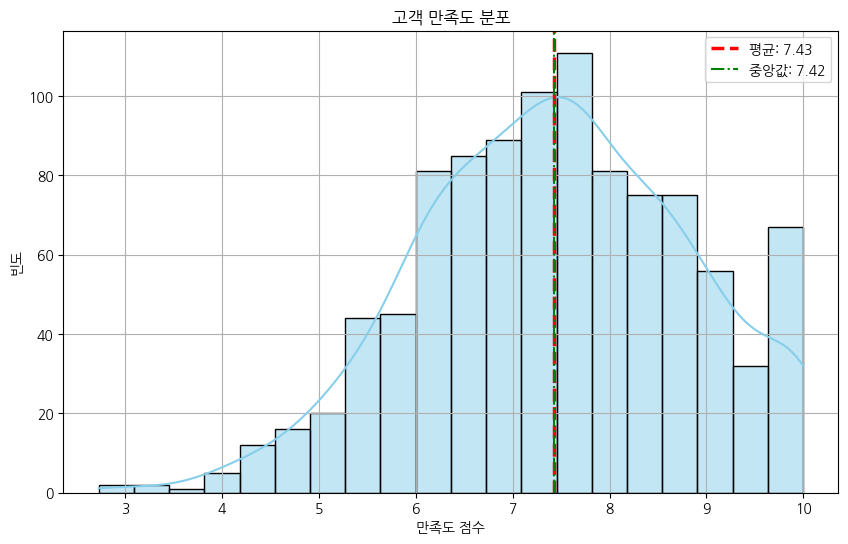

In [3]:
# 예시 코드
# 중심 경향성과 산포도
mean = df1['score'].mean()
median = df1['score'].median()
mode = df1['score'].mode()[0]
std = df1['score'].std()

print(f"평균: {mean:.2f}")
print(f"중앙값: {median:.2f}")
print(f"최빈값: {mode}")
print(f"표준편차: {std:.2f}")

# 히스토그램 시각화
plt.figure(figsize=(10, 6))
sns.histplot(df1['score'], bins=20, kde=True, color='skyblue')

# 평균, 중앙값 선 표시
# plt.axvline(mean, color='red', linestyle='--', label=f'평균: {mean:.2f}')
# plt.axvline(median, color='green', linestyle='--', label=f'중앙값: {median:.2f}')
plt.axvline(mean, color='red', linestyle='--', linewidth=2.5, label=f'평균: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-.', linewidth=1.5, label=f'중앙값: {median:.2f}')
plt.title('고객 만족도 분포')
plt.xlabel('만족도 점수')
plt.ylabel('빈도')
plt.legend()
plt.grid(True)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?

   - 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요? (예: 대칭형, 정규분포 등)
   - 두 값의 차이가 크다면, 그 이유는 무엇일까요?
   - 어떤 값들이 평균을 끌어내리거나 끌어올렸을까요?

2. 최빈값이 평균보다 낮은 경우, 낮은 점수를 준 고객이 많다는 뜻일 수 있습니다. 이 경우 데이터 분포는 어느 쪽으로 치우쳐 있을까요?

   - 반대로 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요? 이럴 때 분포가 어떻게 달라질 수 있을까요?

3. 이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?


<details>
  <summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. 평균과 중앙값 사이의 차이는 어느 정도인가요?

   - 두 값이 비슷하다면, 이 데이터는 어떤 분포 형태일 가능성이 있을까요?
     → **정규분포** 또는 **대칭형 분포**  
     → 대부분의 값이 평균 근처에 몰려 있고, 좌우 대칭적인 형태

   - **두 값의 차이가 크다면, 그 이유는 무엇일까요?**  
     → **극단값(outlier)**의 존재 때문일 수 있습니다.  
     → 예: 일부 고객이 매우 낮은 점수를 줘서 평균이 내려감

   > 💡 [질문]  
   > 어떤 점수가 평균을 끌어내렸을까요?  
   > 중앙값은 왜 그 영향을 덜 받았을까요?

2. 최빈값이 평균보다 낮은 경우, 이 데이터의 분포는 어느 쪽으로 치우쳐 있을까요?  
   → **오른쪽으로 치우친 분포 (양의 왜도)**  
   → 많은 고객이 낮은 점수를 줬고, 일부 높은 점수가 평균을 끌어올린 경우

   - 반대로, 최빈값이 평균보다 높은 경우에는 어떤 해석이 가능할까요?
     → **왼쪽으로 치우친 분포 (음의 왜도)**  
     → 많은 고객이 높은 점수를 줬지만, 일부 낮은 점수가 평균을 끌어내림

3. **이 데이터를 바탕으로 고객 만족도를 높이기 위한 마케팅 전략에는 어떤 것들이 있을까요?**

| 고객군         | 특징           | 전략 예시                              |
| -------------- | -------------- | -------------------------------------- |
| 높은 점수 고객 | 충성도 높음    | 후기 작성 유도, VIP 혜택 제공          |
| 중간 점수 고객 | 개선 여지 있음 | 피드백 요청, 고객 경험 개선            |
| 낮은 점수 고객 | 불만족 가능성  | 사과 메시지, 쿠폰 제공, 고객 응대 강화 |

</details>


# 문제 2. 평균 vs 중앙값 비교

**📘 문제**

- A지역과 B지역의 연봉 데이터를 비교해 봅시다.
- B 지역에는 일부 고소득자가 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**

- 각 지역의 평균 연봉과 중앙값을 구해 봅시다.
- 지역별 박스플롯(Boxplot)을 그려서 분포의 차이를 시각적으로 확인해 봅시다.


In [4]:
# 데이터 생성
np.random.seed(2025)

# A 지역: 평균 300, 표준편차 50
region_a = np.random.normal(300, 50, 100)

# B 지역: 일반 소득자 + 극단적인 고소득자 포함
region_b = np.concatenate([
    np.random.normal(280, 40, 95),    # 일반 소득자 95명
    np.random.normal(1500, 200, 5)    # 고소득자 5명
])

df2 = pd.DataFrame({
    'region': ['A'] * 100 + ['B'] * 100,
    'salary': np.concatenate([region_a, region_b])
})

📊 지역별 연봉 요약 통계:
          mean  median
region                
A       292.51  294.32
B       347.59  287.35


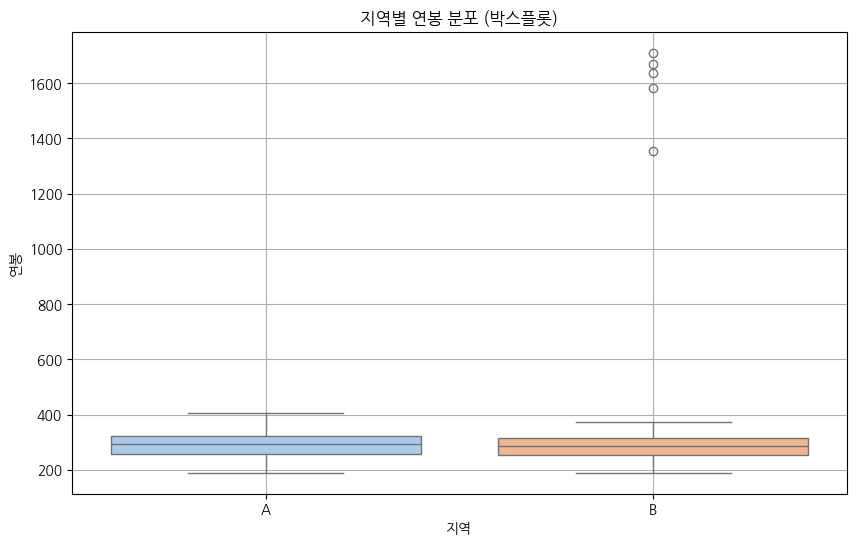

In [ ]:
# 예시 코드
# 평균과 중앙값 계산
summary = df2.groupby('region')['salary'].agg(['mean', 'median']).round(2)
print("📊 지역별 연봉 요약 통계:")
print(summary)

# 박스플롯 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='region', y='salary', palette='pastel')
plt.title('지역별 연봉 분포 (박스플롯)')
plt.xlabel('지역')
plt.ylabel('연봉')
plt.grid(True)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?

   - 두 지역의 평균 차이가 의미하는 바는 무엇인가요?
   - 고소득자가 있는 지역의 평균은 어떤 영향을 받을까요?

2. 중앙값은 어떠한가요?

   - 평균과 비교했을 때, 중앙값이 더 낮거나 높다면 어떤 해석이 가능할까요?

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?

   - 평균과 중앙값 중 어떤 지표가 극단값에 더 민감한가요?

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?

   - 이상치(Outlier)는 어떻게 표시되나요?
   - 두 지역의 분포 폭(사분위 범위)은 어떻게 다른가요?

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?
   - 어떤 경우에는 중앙값이 더 유용한 지표일 수 있을까요?


<details>
  <summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. A 지역과 B 지역의 평균 연봉은 어떻게 다른가요?

   - 평균의 차이는 **데이터 분포의 특성**을 보여줍니다.
   - B 지역에는 **소수의 고소득자**가 있어 평균이 **크게 상승**합니다.
   - A 지역은 극단값이 없기 때문에 평균 ≈ 중앙값입니다.

   > 💡 평균은 극단값에 영향을 많이 받는 지표입니다. 고소득자 몇 명이 전체 평균을 왜곡시킬 수 있습니다.

2. 중앙값은 어떠한가요?

   - 중앙값은 **데이터의 중간값**으로, **극단값의 영향을 받지 않습니다**.
   - 평균보다 중앙값이 낮다면 → **고소득자**가 평균을 끌어올린 상황일 수 있습니다.

   > 💬 질문: 평균이 400인데 중앙값이 285라면, 진짜 대부분의 사람은 얼마를 버는 걸까요?

3. 극단값(고소득자)의 영향은 어디에서 더 크게 나타날까요?

   - **평균은 극단값에 민감**하고
   - 중앙값은 **극단값에 둔감**합니다.
   - 따라서 극단값이 존재하면 평균과 중앙값의 차이가 커집니다.

   > 💡 데이터에 극단값이 포함되어 있을수록 평균과 중앙값 차이를 꼭 확인해 보세요.

4. 박스플롯을 통해 어떤 점을 관찰할 수 있나요?

   - **이상치(outlier)**: 박스플롯의 수염 밖 점들로 표시됩니다.
   - **사분위 범위(IQR)**: 박스(상자)의 길이로 표현됩니다.
   - B 지역은 **상자가 아래로 치우치고**, **이상치가 위쪽에 많음** → **양의 왜도**

   > 💡 박스의 위치, 수염의 길이, 이상치의 위치를 함께 보면 분포의 특성을 알 수 있습니다.

5. 평균만 보고 판단했을 때 생길 수 있는 오해는 무엇인가요?

   - 평균만 보면 "B 지역이 부자 동네"처럼 보이지만,  
     실제로는 **대다수의 사람은 그렇지 않을 수 있습니다**.
   - 이럴 때는 평균보다 중앙값이 **현실을 더 잘 반영**할 수 있습니다.

   > 💬 질문: 정책 입안자가 평균만 보고 판단한다면, 어떤 문제가 생길 수 있을까요?

📌 **정리**

- **평균**: 전체 분위기 파악에 좋지만, 극단값에 민감
- **중앙값**: 일반적인 사람들의 수준을 파악할 때 더 적합
- **박스플롯**: 분포, 이상치, 대칭성 등을 시각적으로 이해하는 데 도움

</details>


# 문제 3. 이상값과 분산 비교

**📘 문제**

- 1반과 2반의 시험 점수 분포를 비교해 봅시다.
- 2반에는 극단적인 이상값(예: 부정행위로 0점)이 포함되어 있습니다.

<br>

**📌 아래를 수행해 보세요:**

1. 각 반의 평균, 표준편차, 최소/최대값을 계산해 봅시다.
2. 박스플롯을 사용하여 두 반의 분포 차이를 시각적으로 비교해 봅시다.
3. 이상값이 통계 지표에 어떤 영향을 주는지 생각해 봅시다.


In [ ]:
# 데이터 생성
np.random.seed(2025)  # 재현 가능성을 위해 시드 고정

# 1반: 평균 75, 표준편차 8
class1 = np.random.normal(75, 8, 30)

# 2반: 일반 학생 + 이상값(0점, 130점)
class2 = np.concatenate([
    np.random.normal(75, 15, 28),  # 일반 학생
    [0, 130]                       # 극단적인 이상값
])

df3 = pd.DataFrame({
    'class': ['1반'] * 30 + ['2반'] * 30,
    'score': np.concatenate([class1, class2])
})

📊 [1반 통계]
평균: 75.72
표준편차: 7.06
최소값: 60.69, 최대값: 92.18

📊 [2반 통계]
평균: 73.73
표준편차: 22.34
최소값: 0.00, 최대값: 130.00


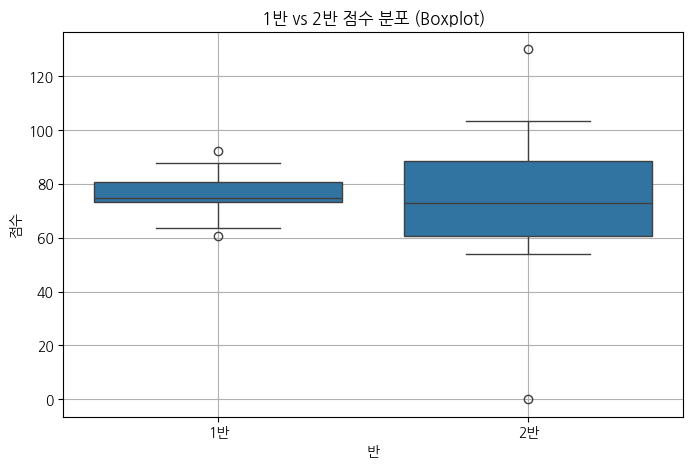

In [ ]:
# 각 반별 데이터 추출
class1 = df3[df3['class'] == '1반']['score']
class2 = df3[df3['class'] == '2반']['score']

# 통계값 계산
print("📊 [1반 통계]")
print(f"평균: {class1.mean():.2f}")
print(f"표준편차: {class1.std():.2f}")
print(f"최소값: {class1.min():.2f}, 최대값: {class1.max():.2f}")
print()

print("📊 [2반 통계]")
print(f"평균: {class2.mean():.2f}")
print(f"표준편차: {class2.std():.2f}")
print(f"최소값: {class2.min():.2f}, 최대값: {class2.max():.2f}")

# 박스플롯 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='score', data=df3)
plt.title("1반 vs 2반 점수 분포 (Boxplot)")
plt.xlabel("반")
plt.ylabel("점수")
plt.grid(True)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?

   - 점수 분포의 퍼짐 정도는 어떤 지표로 확인할 수 있을까요?
   - 이상값이 포함되면 표준편차나 범위는 어떻게 달라질까요?

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?

   - 극단적으로 낮거나 높은 점수가 평균을 끌어내리거나 끌어올렸나요?
   - 평균과 중앙값의 차이가 의미하는 바는 무엇인가요?

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?

   - 이상값(outlier)은 박스플롯에서 어떤 형태로 나타나나요?
   - 두 반의 박스(사분위 범위)는 어떻게 다르게 보이나요?

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?
   - 예를 들어, 교사가 평균 점수만 보고 2반이 부족하다고 판단한다면?
   - 중앙값이나 표준편차 같은 지표와 함께 분석하는 것은 왜 중요할까요?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong>
</summary>

1. 어떤 반의 점수 분산이 더 크고, 왜 그럴까요?

   - 2반의 분산(표준편차)이 더 큽니다.
   - 이유는 **극단적으로 낮은 점수(예: 0점, 20점)**이 포함되어 있어 전체 분포가 퍼졌기 때문입니다.
   - 표준편차는 평균으로부터의 거리를 사용하므로, 극단값이 포함되면 값이 급격히 커집니다.

   > 💡 평균, 표준편차, 범위는 모두 이상값의 영향을 받는 지표입니다.

2. 이상값이 있는 반의 평균은 어떤 영향을 받았나요?

   - 2반의 평균은 **이상값(매우 낮은 점수)**의 영향으로 평균이 낮아졌습니다.
   - 반면, 중앙값은 크기 순서의 중간값이므로 극단값에 거의 영향을 받지 않습니다.
   - 따라서 평균과 중앙값의 차이가 크다면, 이상값이 존재할 가능성이 높습니다.

   > 💬 질문: 평균이 73점, 중앙값이 78점이라면, 실제로 많은 학생들은 몇 점을 받았을까요?

3. 박스플롯을 통해 이상값은 어떻게 드러나나요?

   - 박스플롯에서 **이상값은 점(dot)**으로 따로 표시됩니다 (outlier).
   - 1반은 이상값이 거의 없고, 2반은 극단값이 박스 밖 점으로 나타납니다.
   - 또한, **2반의 박스 폭(IQR)**이 넓어지거나 비대칭적으로 보일 수 있습니다.

   > 💡 박스 위치, 수염의 길이, 이상치의 위치를 함께 보면 분포의 특성을 시각적으로 파악할 수 있어요.

4. 평균만 보고 평가했을 때 생길 수 있는 오해는 무엇인가요?

   - 평균만 보면 “2반이 성적이 더 낮다”고 판단할 수 있지만,
   - 실제로는 일부 극단값에 의해 왜곡된 평균일 수 있습니다.
   - 이런 경우에는 중앙값이나 표준편차 등 다른 지표들과 함께 해석해야 합니다.

   > 💬 질문: 교사가 평균 점수만 보고 2반 전체에 보충수업을 결정한다면, 어떤 문제가 생길 수 있을까요?

</detial>


# 문제 4. IQR 이상값 제거

**📘 문제**

- 앞의 문제에서 2반에는 **극단적인 이상값(예: 매우 낮은 점수)**이 포함되어 있어
  통계 지표, 특히 평균에 큰 영향을 주는 것을 확인했습니다.
- 이번에는 **IQR(사분위 범위)**을 기준으로 이상값을 제거한 뒤, 이상값 제거 전후의 평균을 비교해 봅시다

<br>

**📌 아래를 수행해 보세요:**

- 2반의 점수 데이터를 대상으로 IQR 기준을 사용해 이상값을 판별하고 제거해 봅시다.
- 이상값 제거 전과 제거 후의 평균을 각각 계산해 봅시다.
- 이상값 제거가 평균에 어떤 영향을 주는지 설명해 봅시다.
- 필요하다면 중앙값과도 비교해 봅시다.


📊 [이상값 제거 전]
평균: 73.73
중앙값: 73.00

📊 [이상값 제거 후]
평균: 74.35
중앙값: 73.00
제거된 데이터 수: 2개


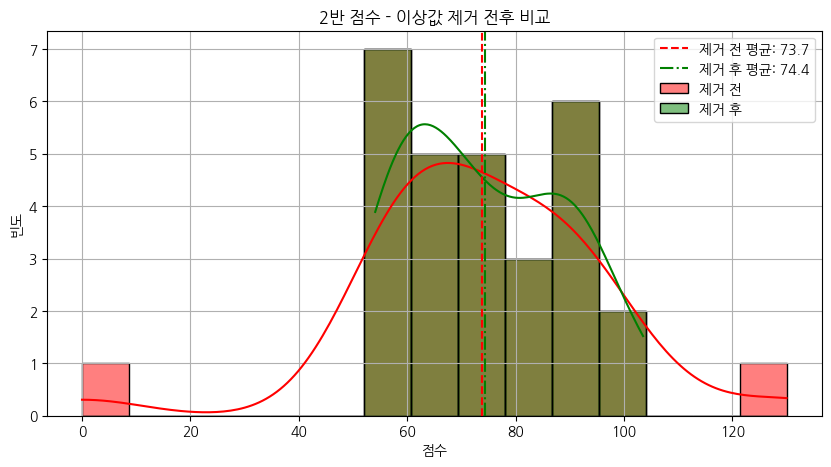

In [ ]:
# 2반 점수만 추출
class2 = df3[df3['class'] == '2반']['score']

# IQR 계산
Q1 = class2.quantile(0.25)
Q3 = class2.quantile(0.75)
IQR = Q3 - Q1

# 이상값 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상값 제거 후 데이터
class2_filtered = class2[(class2 >= lower_bound) & (class2 <= upper_bound)]

# 평균 및 중앙값 비교
print("📊 [이상값 제거 전]")
print(f"평균: {class2.mean():.2f}")
print(f"중앙값: {class2.median():.2f}")
print()

print("📊 [이상값 제거 후]")
print(f"평균: {class2_filtered.mean():.2f}")
print(f"중앙값: {class2_filtered.median():.2f}")
print(f"제거된 데이터 수: {len(class2) - len(class2_filtered)}개")

# 히스토그램 시각화
plt.figure(figsize=(10, 5))
# sns.histplot(class2, color='red', label='제거 전', bins=15, kde=True)
# sns.histplot(class2_filtered, color='green', label='제거 후', bins=15, kde=True)

# 공통 범위로 bins 고정
common_bins = np.linspace(0, 130, 16)
sns.histplot(class2, bins=common_bins, color='red', label='제거 전', kde=True, alpha=0.5)
sns.histplot(class2_filtered, bins=common_bins, color='green', label='제거 후', kde=True, alpha=0.5)

plt.axvline(class2.mean(), color='red', linestyle='--', label=f'제거 전 평균: {class2.mean():.1f}')
plt.axvline(class2_filtered.mean(), color='green', linestyle='-.', label=f'제거 후 평균: {class2_filtered.mean():.1f}')
plt.title('2반 점수 - 이상값 제거 전후 비교')
plt.xlabel('점수')
plt.ylabel('빈도')
plt.legend()
plt.grid(True)
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 이상값 제거 전후 평균은 어떻게 달라졌나요?

   - 평균이 중앙값에 가까워졌나요?
   - 이상값 제거가 평균에 어떤 방향으로 영향을 주었나요?

2. 왜 IQR을 기준으로 이상값을 판단할까요?

   - IQR은 데이터를 어떻게 나누고, 어떤 방식으로 이상값을 정의하나요?
   - 평균이나 표준편차 기준과 비교했을 때 어떤 점이 더 강건할까요?

3. 이상값은 언제 제거하고, 언제 유지해야 할까요?

   - 분석 목적에 따라 이상값은 중요한 정보가 될 수 있습니다.

4. 중앙값과 평균은 각각 어떤 상황에서 더 유용한 지표인가요?
   - 이상값이 있을 때 어떤 지표가 더 신뢰할 수 있나요?
   - 두 지표를 함께 보면 어떤 장점이 있을까요?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. 이상값 제거 전후 평균은 어떻게 달라졌나요?

   - 이상값(예: 0점, 20점)을 제거한 후 평균은 중앙값에 더 가까워졌습니다.
   - 이는 이상값이 평균을 강하게 끌어내리고 있었다는 증거입니다.
   - 제거 후 평균은 데이터의 일반적인 경향을 더 잘 반영합니다.
     > 💬 [질문] 제거 전 평균이 73점, 중앙값이 78점이었다면, 이상값 제거 후 평균은 몇 점 정도로 바뀌었을까요?

2. 왜 IQR을 기준으로 이상값을 판단할까요?

   - **IQR(Interquartile Range)**은 Q1~Q3 범위의 크기를 기반으로 그 범위를 벗어나는 값들을 이상값으로 정의합니다.
   - 중앙값 기준이기 때문에 극단값에 영향을 덜 받으며 강건한 방법입니다.
   - 평균 ± 표준편차 기준은 이상값 자체에 의해 왜곡될 수 있습니다.
     > 💡 [참고] IQR 기준 이상값은 Q1 - 1.5×IQR보다 작거나, Q3 + 1.5×IQR보다 큰 값입니다.

3. 이상값은 항상 제거해야 하나요? - 아닙니다! - 분석 목적에 따라 이상값은 중요한 정보일 수 있습니다. - 예를 들어, 부진 학생을 지원하기 위한 분석이라면
   낮은 점수 자체가 분석의 핵심 대상이 될 수 있습니다. > 💬 [질문] 정책 입안자가 부진 학생 지원 대상을 선정하는데 이상값을 제거하면, 어떤 문제가 생길 수 있을까요?

4. 중앙값과 평균은 각각 어떤 상황에서 유용할까요?
   - 평균: 전체 중심을 나타냄, 이상값에 민감 정상 분포, 전체 추세 파악
   - 중앙값: 중간 위치를 나타냄, 이상값에 둔감 이상값이 있는 데이터, 일반적 수준 파악
     > 💡 두 지표를 함께 보면, 데이터의 왜곡 여부와 분포의 비대칭성을 파악할 수 있습니다.

</details>


# 문제 5. 변수 유형 분류

**📘 문제**

- 아래 데이터에서 변수의 유형(연속형, 범주형, 이산형 등)을 구분해 봅시다.
- 변수의 의미를 고려하여 어떤 분석 방식이 적절한지도 함께 생각해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 각 변수의 데이터 타입을 확인해 봅시다.

2. 변수의 의미를 기준으로 다음 중 어떤 유형에 해당하는지 분류해 봅시다.
   - 연속형 (numeric-continuous)
   - 이산형 (numeric-discrete)
   - 범주형 (categorical)
   - 서열형 범주 (ordinal-categorical)


In [ ]:
# 데이터 생성
np.random.seed(2025)
df5 = pd.DataFrame({
    'age': np.random.randint(18, 65, 200),
    'coffee_type': np.random.choice(['아메리카노', '라떼', '카페모카'], 200),
    'size': np.random.choice(['Small', 'Medium', 'Large'], 200),
    'price': np.random.normal(4500, 500, 200),
    'satisfaction': np.random.randint(1, 6, 200)
})

In [ ]:
# 예시 코드
# 데이터 타입 확인
print("📋 변수별 데이터 타입")
print(df5.dtypes)

# 일부 데이터 미리 보기
print("\n📊 데이터 샘플 (상위 5개)")
print(df5.head())

📋 변수별 데이터 타입
age               int64
coffee_type      object
size             object
price           float64
satisfaction      int64
dtype: object

📊 데이터 샘플 (상위 5개)
   age coffee_type    size        price  satisfaction
0   48        카페모카   Small  4435.448359             1
1   36          라떼   Small  4849.195869             4
2   48        카페모카   Large  4365.135391             1
3   30       아메리카노  Medium  3979.605848             2
4   21        카페모카   Small  4650.242695             1


**🧠 데이터를 어떻게 읽을까요?**

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석하는 변수가 있다면 무엇일까요?

2. 변수 유형에 따라 적절한 분석 방법이나 시각화 방식은 어떻게 달라질까요?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. 숫자처럼 보이지만 사실은 범주형 또는 서열형으로 해석해야 할 변수는 무엇일까요?

| 변수명         | 예시 값                    | 저장 형태 | 실제 의미 해석          | 변수 유형 해석                       |
| -------------- | -------------------------- | --------- | ----------------------- | ------------------------------------ |
| `age`          | 18 ~ 64                    | int       | 사람의 나이             | ✅ 연속형 (numeric-continuous)       |
| `coffee_type`  | '아메리카노', '라떼' 등    | object    | 커피 종류               | ✅ 범주형 (categorical)              |
| `size`         | 'Small', 'Medium', 'Large' | object    | 컵 크기 (순서 있음)     | ✅ 서열형 범주 (ordinal-categorical) |
| `price`        | 약 4500 ± 오차             | float     | 커피 가격               | ✅ 연속형 (numeric-continuous)       |
| `satisfaction` | 1 ~ 5                      | int       | 만족도 점수 (순서 있음) | ✅ 서열형 범주 (ordinal-categorical) |

> 💡 `size`와 `satisfaction`은 ‘순서’가 있는 범주형 변수입니다.

    - 숫자로 저장되어 있다고 해서 반드시 수치형은 아닙니다.
    - 변수의 **의미**를 기준으로 해석해야 합니다.

2. 변수 유형에 따라 분석 방식이나 시각화 방식은 어떻게 달라질까요?

| 변수           | 변수 유형   | 분석 방식 예시         | 시각화 예시               |
| -------------- | ----------- | ---------------------- | ------------------------- |
| `age`          | 연속형      | 평균, 표준편차, 분포   | `histplot`, `boxplot`     |
| `coffee_type`  | 범주형      | 빈도수, 선호도         | `countplot`, `pie chart`  |
| `size`         | 서열형 범주 | 순위 분석, 선호도 순서 | `barplot` (순서 정렬)     |
| `price`        | 연속형      | 가격 평균, 회귀 분석   | `scatterplot`, `lineplot` |
| `satisfaction` | 서열형 범주 | 만족도 분포, 평균 비교 | `boxplot`, `violinplot`   |

📌 정리

- 숫자처럼 보여도 **범주형 또는 서열형**일 수 있습니다.
- 변수의 **데이터 타입(dtype)**뿐 아니라 **의미와 맥락**을 고려해서 분류해야 합니다.
- 변수 유형에 따라:
  - 분석 방식 (평균, 빈도, 상관 등)
  - 시각화 방법 (barplot, boxplot 등)
  - 해석 방식이 모두 달라집니다.

> 🎯 **좋은 분석은 변수의 정확한 해석에서 시작됩니다!**

</details>


# 문제 6. 범주형 변수 시각화

**📘 문제**

- 앞에서는 수치형 변수의 분포를 시각화하고, 변수 간의 관계도 살펴보았습니다.
- 이번에는 범주형 변수인 커피 음료 데이터를 시각화해 봅시다.
- 어떤 종류가 많이 판매되었는지 빈도 분석을 통해 알아보겠습니다.

<br>

**📌 아래를 수행해 보세요:**

1. 아래 데이터에서 drink 변수는 판매된 음료의 종류를 나타냅니다.

   - 각각 몇 개씩 판매되었는지 빈도표를 만들어 확인해 봅시다.
   - **막대그래프(bar plot)**를 그려서 결과를 시각화해 봅시다.

2. 시각화 결과를 보고,
   - 어떤 음료가 가장 많이 팔렸는지 파악해 봅시다.
   - 이 결과를 마케팅 전략에 어떻게 활용할 수 있을지 생각해 봅시다.


In [ ]:
# 데이터 생성
df7 = pd.DataFrame({
    'drink': np.random.choice(['아메리카노', '라떼', '콜드브루'], 300)
})

📋 음료별 판매량
drink
콜드브루     108
아메리카노     97
라떼        95
Name: count, dtype: int64

🥤 판매된 커피 종류별 빈도


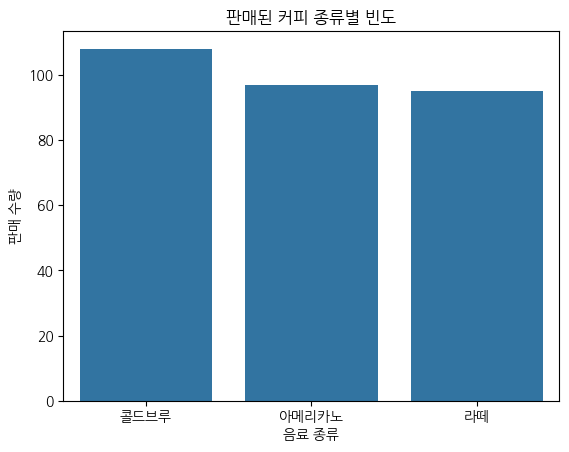

In [ ]:
# 예시 코드
# 빈도표
print("📋 음료별 판매량")
print(df7['drink'].value_counts())

# 막대그래프
print("")
print("🥤 판매된 커피 종류별 빈도")
sns.countplot(data=df7, x='drink', order=df7['drink'].value_counts().index)
plt.title("판매된 커피 종류별 빈도")
plt.xlabel("음료 종류")
plt.ylabel("판매 수량")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 출력된 빈도표와 막대그래프를 보면, 어떤 음료가 가장 많이 판매되었나요?

   - 판매량이 가장 많은 음료는?
   - 그 다음으로 인기 있는 음료는?

2. 이 결과는 어떤 마케팅 전략에 활용할 수 있을까요?

   - 가장 많이 팔린 음료를 주력 상품으로 홍보해야 할까요?
   - 판매량이 적은 음료를 프로모션 대상으로 삼는 것은 어떨까요?

3. 막대그래프는 왜 범주형 변수에 적합할까요?

   - `drink`처럼 종류가 명확히 나뉘는 변수를 분석할 때 어떤 점이 중요한가요?

4. 범주형 변수 분석 시 주의할 점은?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. 출력된 **빈도표와 막대그래프**에서 어떤 음료가 가장 많이 판매되었나요?

   - `value_counts()` 결과와 막대그래프를 보면, 가장 높은 빈도의 음료를 쉽게 파악할 수 있습니다.
   - 예를 들어, `아메리카노`가 가장 길다면 → **가장 많이 팔린 음료**
   - `콜드브루`가 가장 짧다면 → **가장 적게 팔린 음료**
     > 💬 [질문] 가장 많이 팔린 음료는 무엇인가요? 막대의 길이로 어떻게 알 수 있었나요?

2. 이 결과는 어떻게 **마케팅 전략**에 활용할 수 있을까요?

   - 가장 많이 팔린 음료는 고객이 **선호하는 제품** → 주력 상품으로 활용 가능
   - 반대로, 판매량이 적은 음료는 **프로모션**, **샘플링**, **가격 할인** 등으로 수요 유도 가능
   - 다양한 음료를 고르게 판매하기 위한 **균형 전략**도 고려할 수 있음
     > 💬 [질문] 가장 적게 팔린 음료를 어떻게 마케팅하면 좋을까요?

3. 막대그래프는 왜 범주형 변수에 적합할까요?

   - 막대그래프는 **범주별 개수(빈도)**를 시각적으로 비교하는 데 효과적입니다.
   - `drink`처럼 **명확한 구분이 있는 변수(종류, 등급, 지역 등)**에 적합합니다.
   - 막대의 **길이(높이)**로 비교가 직관적이며, 정렬하면 더 쉽게 해석할 수 있습니다.
     > 💡 [참고] `sns.countplot()`은 내부적으로 `value_counts()`를 시각화한 것과 같습니다.

4. 범주형 변수 분석 시 주의할 점은?
   - **카테고리 수가 너무 많거나 너무 적으면** 해석이 어려울 수 있음
   - **범주 간 순서**가 없는 경우에는 **서열을 부여하면 안 됨** (예: 음료 종류는 순위 아님)
   - **불균형한 분포**는 편향된 결과 또는 해석을 이끌 수 있음
     > 💡 [예시] '콜드브루'가 너무 적게 팔렸다면, 시즌 상품이거나 접근성이 낮은 문제일 수 있어요.

> 🎯 범주형 변수는 **분류**, **비교**, **전략 수립**에 유용한 인사이트를 제공합니다.

</details>


# 문제 7. 요일별 평균 비교

**📘 문제**

- 이번에는 요일 별 소비 금액 데이터를 분석해 봅시다.
- 각 요일마다 평균 소비 금액이 얼마나 되는지 비교하고,
  **평일과 주말의 소비 패턴 차이**도 함께 살펴보겠습니다.

<br>

**📌 아래를 수행해 보세요:**

1. 아래 데이터를 사용하여 `day`(요일)별 `amount`(소비 금액)의 평균을 계산해 봅시다.
2. 요일별 평균 금액을 **막대그래프(bar plot)**로 시각화해 봅시다.


In [ ]:
# 데이터 생성
df8 = pd.DataFrame({
    'day': np.random.choice(['월', '화', '수', '목', '금', '토', '일'], 500),
    'amount': np.random.normal(12000, 2000, 500)
})

📊 요일별 평균 소비 금액
day
월    11709.2
화    11762.9
수    12233.0
목    11983.7
금    11750.0
토    12188.1
일    11502.6
Name: amount, dtype: float64

💰 요일별 평균 소비 금액


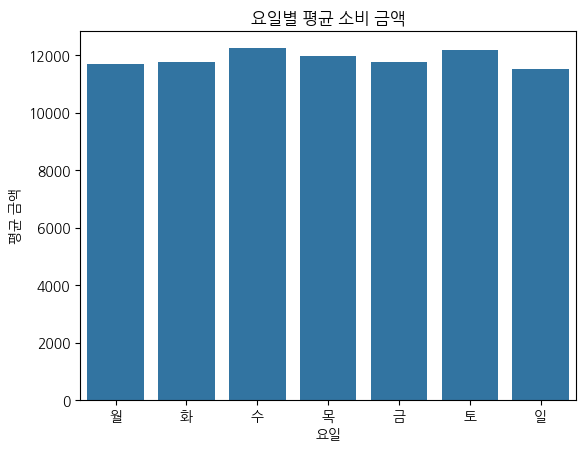

In [ ]:
# 예시 코드
# 요일 순서 지정
day_order = ['월', '화', '수', '목', '금', '토', '일']

# 요일별 평균 계산
mean_by_day = df8.groupby('day')['amount'].mean().reindex(day_order)

# 출력
print("📊 요일별 평균 소비 금액")
print(mean_by_day.round(1))

# 시각화
print("")
print("💰 요일별 평균 소비 금액")
sns.barplot(x=mean_by_day.index, y=mean_by_day.values)
plt.title("요일별 평균 소비 금액")
plt.xlabel("요일")
plt.ylabel("평균 금액")
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. 어떤 요일에 소비 금액이 가장 높나요?

   - 주말(토, 일)과 평일(월~금) 중 어떤 쪽의 평균이 더 높은가요?

2. 소비 금액이 적은 요일은 언제인가요? 왜 그럴까요?

3. 이 결과를 어떻게 활용할 수 있을까요?
   - 주말에 더 많은 재고를 준비하거나
   - 평일에 할인 이벤트를 기획하는 등의 운영/마케팅 전략으로 이어질 수 있을까요?


> 💬 정리해 보기
>
> - 범주형 변수(요일)별로 연속형 변수(소비 금액)의 평균을 비교하면 소비 패턴을 이해하고 전략을 수립하는 데 유용한 인사이트를 얻을 수 있습니다.


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. **어떤 요일에 소비 금액이 가장 높았나요?**

   - 막대그래프에서 막대가 가장 **높은 요일**이 평균 소비 금액이 가장 높은 날입니다.
   - 일반적으로 **주말(토, 일)**이 가장 높게 나타나는 경우가 많습니다.
   - 이는 사람들이 여가 시간에 소비 활동을 더 많이 하기 때문일 수 있습니다.
     > 💬 [질문] 주말과 평일 중 어느 쪽의 평균 소비 금액이 더 높나요?

2. **소비 금액이 가장 적은 요일은 언제인가요?**

   - 막대가 가장 **낮은 요일**을 확인합니다.
   - 보통 **화요일이나 수요일**처럼 한 주 중간에 소비가 적을 수 있습니다.
   - 이유는 업무 집중도, 외출 빈도, 행사 유무 등 다양한 요인이 있을 수 있습니다.
     > 💬 [질문] 소비 금액이 적은 요일은 왜 그렇다고 생각하나요?

3. **이 결과는 어떻게 활용할 수 있을까요?**

   - **소비가 많은 요일**:  
     → 인기 메뉴 재고를 늘리거나, 집중 마케팅을 통해 수익 극대화 기회
   - **소비가 적은 요일**:  
     → 평일 할인, 쿠폰 이벤트 등으로 유입을 유도할 수 있음
   - 특정 요일에 집중된 소비가 있다면, 인력 배치나 운영 시간 조정도 고려 가능
     > 💬 [질문] 운영자 입장에서 이 데이터를 어떻게 활용할 수 있을까요?

4. **요일별 분석 시 주의할 점은?**
   - 샘플 수가 고르게 분포되어 있는지 확인해야 합니다.
   - 특정 요일에 데이터가 적으면 평균이 신뢰하기 어려울 수 있음
   - 요일은 **순서형 범주**이므로 시각화 시 순서를 고려해 정렬해야 해석이 쉬움
     > 💡 [참고] `reindex(day_order)`를 사용해 요일을 월~일 순서대로 정렬했어요.

> 🎯 요일별 소비 패턴은 **운영 전략 수립**과 **맞춤 마케팅 기획**에 매우 중요한 정보입니다.

</details>


# 문제 8. 정규분포와 표준편차

**📘 문제**

- 정규분포와 표준편차의 개념을 실제 데이터에 적용해 보겠습니다.
- 정규분포를 따르는 점수 데이터에서 다음을 확인해 봅시다:
  - 평균 ±1σ, 평균 ±2σ 범위에 속한 값들의 비율은 실제로 얼마나 되는가?
  - 이 결과가 이론적인 68-95-99 법칙과 얼마나 유사한지 비교해 봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 평균이 70, 표준편차가 10인 정규분포 데이터를 1000개 생성해 봅시다.
2. 평균을 중심으로 ±1σ, ±2σ 범위에 포함되는 데이터의 비율을 계산해 봅시다.
3. 결과를 바탕으로 68-95-99 법칙과 비교해 봅시다.


In [ ]:
# 데이터 생성
np.random.seed(2025)
data = np.random.normal(loc=70, scale=10, size=1000)

# 평균과 표준편차
mean = np.mean(data)
std = np.std(data)

# 비율 계산
within_1 = np.mean((data >= mean - std) & (data <= mean + std))
within_2 = np.mean((data >= mean - 2*std) & (data <= mean + 2*std))

print(f"±1σ 범위 비율: {within_1:.2%}")
print(f"±2σ 범위 비율: {within_2:.2%}")

±1σ 범위 비율: 68.70%
±2σ 범위 비율: 95.00%


**🧠 데이터를 어떻게 읽을까요?**

1. ±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?
2. 이 결과는 68–95–99 법칙과 얼마나 비슷했나요?
3. 표준편차는 왜 중요한 지표인가요?
4. 이 개념이 실제로 어떻게 활용될 수 있을까요?


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. **±1σ, ±2σ 범위에 실제로 몇 %의 데이터가 포함되었나요?**

   - ±1σ: 약 **68%**, ±2σ: 약 **95%**에 근접한 결과가 나왔다면
   - 이는 실제 데이터도 **정규분포의 특징**을 잘 따르고 있다는 의미입니다.
     > 💬 [질문] ±1σ, ±2σ 범위에 속한 데이터의 비율은 몇 %였나요?

2. **이 결과는 68–95–99 법칙과 얼마나 비슷했나요?**

   - 이론적으로 정규분포 데이터는 다음과 같은 비율을 따릅니다:
     - ±1σ: 약 **68.27%**
     - ±2σ: 약 **95.45%**
     - ±3σ: 약 **99.73%**
   - 실측 결과가 이와 유사하다면 → 정규분포 가정이 타당함
     > 💡 [참고] 이 법칙을 "정규분포의 3σ 법칙"이라고도 부릅니다.

3. **표준편차는 왜 중요한 지표인가요?**

   - 표준편차는 데이터가 **평균을 기준으로 얼마나 흩어져 있는지**를 나타냅니다.
   - 작을수록 데이터가 평균 근처에 몰리고, 클수록 퍼져 있는 분포입니다.
   - 정규분포에서는 표준편차만 알면 전체 분포의 **형태와 확률 예측**이 가능해집니다.
     > 💬 [질문] 평균은 같지만 표준편차가 다른 두 분포는 어떤 차이가 있을까요?

4. **이 개념이 실제로 어떻게 활용될 수 있을까요?**
   - 시험 점수, IQ, 제품 품질 관리, 금융 리스크 분석 등에서 자주 사용됩니다.
   - 예: "이 제품은 평균 ±2σ 범위 안에 들어야 합격입니다."
     > 💡 [예시] 불량률 5% 이하를 목표로 할 때, ±2σ 기준을 사용하는 경우가 많습니다.

> 🎯 정규분포와 표준편차를 이해하면, **데이터 해석의 눈**이 넓어집니다!

</details>


# 문제 9. 표본 평균 실험

**📘 문제**

- 큰 모집단에서 표본을 여러 번 추출하여 표본 평균의 분포를 비교해봅시다.

<br>

**📌 아래를 수행해 보세요:**

1. 평균이 100, 표준편차가 15인 모집단을 생성합니다.
2. 다음 두 조건에서 각각 1000번씩 표본 평균을 구합니다:
   - 표본 크기 5
   - 표본 크기 50
3. 두 조건의 **표본 평균 분포(histogram)**를 비교합니다.


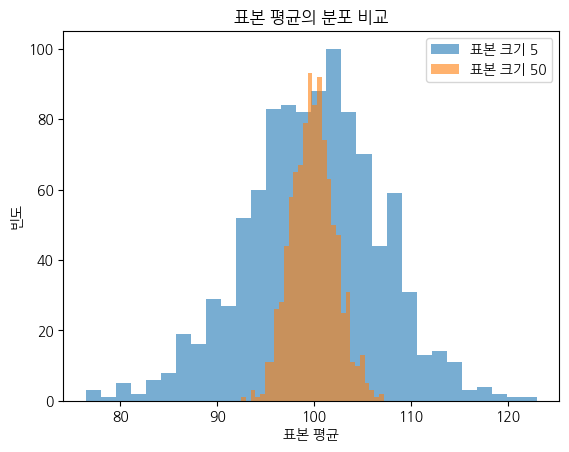

In [ ]:
# 예시 코드
np.random.seed(2025)
population = np.random.normal(100, 15, 10000)

sample_means_5 = [np.mean(np.random.choice(population, 5)) for _ in range(1000)]
sample_means_50 = [np.mean(np.random.choice(population, 50)) for _ in range(1000)]

plt.hist(sample_means_5, bins=30, alpha=0.6, label='표본 크기 5')
plt.hist(sample_means_50, bins=30, alpha=0.6, label='표본 크기 50')
plt.title("표본 평균의 분포 비교")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.legend()
plt.show()

**🧠 데이터를 어떻게 읽을까요?**

1. **표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?**
2. **왜 표본 크기가 중요할까요?**
3. **이 개념은 실제로 어디에 활용될 수 있을까요?**


<details>
<summary><strong>🧑‍🏫 해설 보기</strong></summary>

1. **표본 크기가 다를 때 표본 평균 분포는 어떻게 달라졌나요?**

   - 표본 크기가 **작을수록 (n=5)** 분포가 **넓고 퍼져 있음**
   - 표본 크기가 **클수록 (n=50)** 분포가 **좁고 평균에 더 몰림**
   - 이는 **표본 평균의 분산이 작아지기 때문**입니다.
     > 💬 [질문] 두 분포 중 어디가 평균값 근처에 더 모여 있나요? 왜 그럴까요?

2. **왜 표본 크기가 중요할까요?**

   - 표본 크기가 크면, 평균이 **모집단 평균에 더 가까운 값**을 가질 확률이 높아집니다.
   - 이는 **표본 평균의 표준편차(표준오차)**가 작아지기 때문입니다.
   - → 더 **정확하고 신뢰할 수 있는 추정**이 가능해집니다.
     > 💡 [참고] 표준오차(SE) = σ / √n → n이 커질수록 SE는 작아짐

3. **이 개념은 실제로 어디에 활용될 수 있을까요?**

   - 여론조사, 품질관리, 의료 임상시험, 교육 성적 예측 등
   - 제한된 표본으로 전체 모집단을 **정확하게 추정하기 위한 핵심 원리**
     > 💬 [질문] 왜 조사 기관은 큰 표본을 사용하려 할까요?

4. **추가로 해볼 수 있는 탐구 활동은?**
   - 표본 크기 10, 30, 100 등 다양한 조건에서 비교
   - 표준편차가 다른 모집단으로 실험 반복
   - 표본 평균 분포의 정규성 확인 (`sns.histplot` + `kde=True` 활용 등)

> 🎯 표본 크기의 효과를 직접 실험해보면, **통계적 추정의 원리**를 직관적으로 이해할 수 있습니다!

</details>


> **이것이 바로 중심극한정리입니다! 🎯**

- 표본 평균을 여러 번 구해서 **그 분포를 보면**, 표본 크기가 커질수록 점점 **정규분포에 가까워집니다.**
- 모집단이 정규분포가 아니더라도, **표본 크기만 충분히 크면** 평균의 분포는 정규분포 형태로 수렴합니다.
- → 현실에서 많은 통계 기법이 정규분포를 가정하는 이유입니다.
  > 💡 [핵심 개념] 중심극한정리는 “표본 평균의 분포는 정규분포에 수렴한다”는 것을 말합니다.

> **큰 수의 법칙과는 어떻게 다를까요?**

- **큰 수의 법칙**: 표본 크기가 클수록 **한 번의 표본 평균**이 모집단 평균에 가까워진다.
- **중심극한정리**: 표본 평균을 많이 구했을 때 **그 분포 자체가 정규분포로 수렴**한다.
  > ✅ 문제 10은 중심극한정리를 시각적으로 보여주는 실험입니다.
